In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pyrex
#import pyrex.custom.ara as ara
from pyrex.internal_functions import normalize
import os
import sys
import seaborn as sns
import polReco_util as util
import scipy

import ROOT
from ROOT import TCanvas, TGraph
from ROOT import gROOT
from ROOT import gInterpreter, gSystem
from ROOT import TChain, TSelector, TTree
from scipy.stats import norm
from scipy.stats import rayleigh

#add headers from AraSim. Not sure if all of them are needed, and I'm lazy to check that. MAK SURE to change the location of the headers
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Position.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Report.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Detector.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Settings.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/EarthModel.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Event.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Spectra.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Interaction.h"')


gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/libRootFftwWrapper/include/FFTtools.h"')


# gSystem.Load('/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/libAra.so') #load the simulation event library. You might get an error asking for the eventSim dictionry. To solve that, go to where you compiled AraSim, find that file, and copy it to where you set LD_LIBRARY_PATH.
# gSystem.Load('/cvmfs/ara.opensciencegrid.org/trunk/centos7/ara_build/lib/libAraEvent.so')
gSystem.Load('/users/PAS0654/jflaherty13/source/AraRoot/AraRoot_build/lib/libAraEvent.so')
gSystem.Load("/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/libRootFftwWrapper/build/libRootFftwWrapper.so")

gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Position.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Report.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Detector.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Settings.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/IceModel.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/EarthModel.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Event.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Spectra.h"')
# gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Interaction.h"')

# sys.path.append("/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/ARA_cvmfs/root_build/lib/") # go to parent dir
#sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")  #I don't have access to this directory in Jorge's account
#sys.path.append("/users/PAS0654/jflaherty13/.local/lib/python3.9/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
# import math
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
#import matplotlib as mpl
#import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
#import itertools

# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
#mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

# import mplcyberpunk
# plt.style.use("cyberpunk")

#current_palette = sns.color_palette('colorblind', 10)
current_palette = sns.color_palette('bright', 10)

/cvmfs/ara.opensciencegrid.org/trunk/centos7/root_build/lib/cppyy/__init__.py:72: DeprecationWarning: invalid escape sequence \d
  if re.match('^libcppyy_backend\d_\d$', lib_name):


Welcome to JupyROOT 6.22/06


Warning in <TClassTable::Add>: class FFTtools::AnalyticSignal already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CompositeSignal already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::BandlimitedSampledSignal already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::ThermalNoise already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::Averager already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT::MotherWavelet already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT::Ricker already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT::Ridger already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT::Morlet already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::DigitalFilter already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::DigitalFilterSeries already in T

In [2]:
runNumber = 90
rawSrcFolder = "/users/PAS0654/jflaherty13/source/AraSim/outputs/test/AraOut.setup_variablePsi="+str(runNumber)+".txt.run"+str(runNumber)+".root"
rawFilename = rawSrcFolder

In [3]:
print("runNumber = " + str(runNumber))
print("Sourcing raw data from " + str(rawSrcFolder))

runNumber = 90
Sourcing raw data from /users/PAS0654/jflaherty13/source/AraSim/outputs/test/AraOut.setup_variablePsi=90.txt.run90.root


In [4]:
rawInputFile = ROOT.TFile.Open(rawFilename)

# eventTree = rawInputFile.Get("eventTree")
# simTree = rawInputFile.Get("AraTree2")

file_list = []
file_list.append(rawFilename)

eventTree = TChain("eventTree") #Define chain and tree that needs to be read. "VTree" in this case.
simSettingsTree = TChain("AraTree")
simTree = TChain("AraTree2")

for line in file_list:
    eventTree.AddFile(line)
    simTree.AddFile(line)
    simSettingsTree.AddFile(line)

reportPtr = ROOT.Report()#report pointer
eventPtr = ROOT.Event()
detectorPtr = ROOT.Detector()
interactionPtr = ROOT.Interaction()
stationPtr = ROOT.ARA_station()

usefulEvent = ROOT.UsefulAtriStationEvent()
rawEvent = ROOT.RawAtriStationEvent()
eventTree.SetBranchAddress("UsefulAtriStationEvent",ROOT.AddressOf(usefulEvent))
eventTree.SetBranchAddress("RawAtriStationEvent",ROOT.AddressOf(rawEvent))
simTree.SetBranchAddress("report",ROOT.AddressOf(reportPtr))
simTree.SetBranchAddress("event", ROOT.AddressOf(eventPtr))
simTree.SetBranchAddress("Nu_Interaction", ROOT.AddressOf(interactionPtr))
simSettingsTree.SetBranchAddress("detector", ROOT.AddressOf(detectorPtr))
simSettingsTree.SetBranchAddress("stations", ROOT.AddressOf(stationPtr))
simSettingsTree.GetEntry(0)

totalRawEvents = eventTree.GetEntries()
print('total raw events:', totalRawEvents) 

total raw events: 100


(<Figure size 864x864 with 16 Axes>,
 array([[<AxesSubplot:title={'center':'Channel 0'}>,
         <AxesSubplot:title={'center':'Channel 1'}>,
         <AxesSubplot:title={'center':'Channel 2'}>,
         <AxesSubplot:title={'center':'Channel 3'}>],
        [<AxesSubplot:title={'center':'Channel 4'}>,
         <AxesSubplot:title={'center':'Channel 5'}>,
         <AxesSubplot:title={'center':'Channel 6'}>,
         <AxesSubplot:title={'center':'Channel 7'}>],
        [<AxesSubplot:title={'center':'Channel 8'}>,
         <AxesSubplot:title={'center':'Channel 9'}>,
         <AxesSubplot:title={'center':'Channel 10'}>,
         <AxesSubplot:title={'center':'Channel 11'}>],
        [<AxesSubplot:title={'center':'Channel 12'}>,
         <AxesSubplot:title={'center':'Channel 13'}>,
         <AxesSubplot:title={'center':'Channel 14'}>,
         <AxesSubplot:title={'center':'Channel 15'}>]], dtype=object))

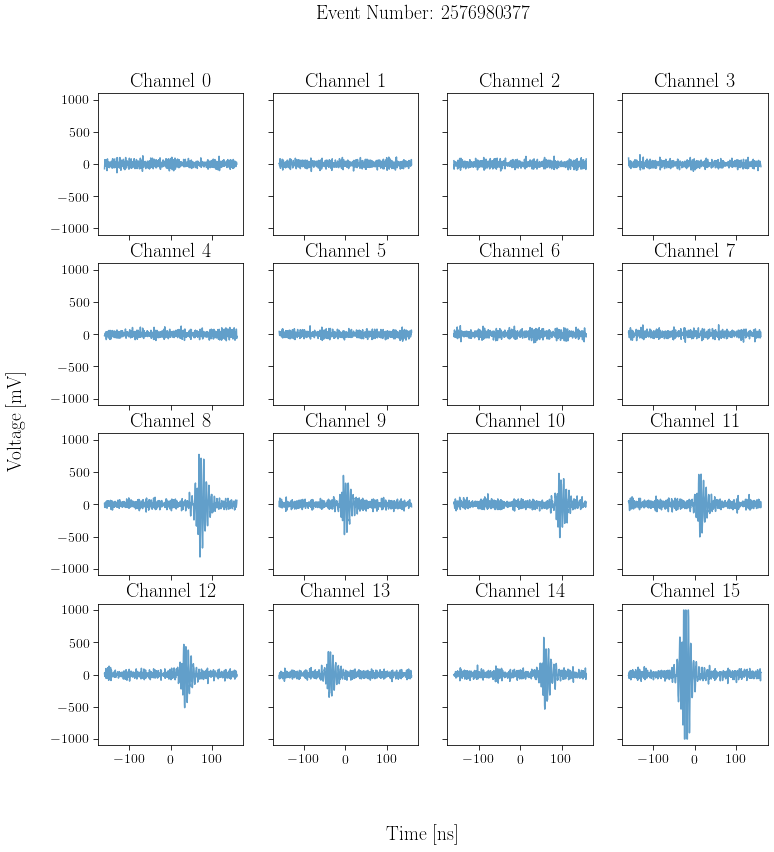

***NOTE***: Year/Unixtime argument is 0. If you want the correct channel mappings for ARA03 & ARA01 for 2018 & after please specify either: 
a) The right year when you call AraGeomTool::getStationInfo(3,2017) where 3 is stationID and 2017 is DB year
b) The Unixtime of any event at the chosen run when you call AraGeomTool::getStationInfo(3,1000000000) where 3 is stationID and 1000000000 is unixtime
OR
c) Call UsefulAtriStationEvent *realAtriEvPtr = new UsefulAtriStationEvent(rawAtriEvPtr, AraCalType::kLatestCalib); ***BEFORE*** 
AraGeomTool::getStationInfo(3,2017)
Opening 2013-2017 SQliteDB using AraGeomTool::getStationInfo()
Opening default 2013-2017 SQLite tables for all stations 


In [5]:
evt = 0
eventTree.GetEntry(0)
util.plotRawWaveform(usefulEvent)